# 3. Estudo das EDOs de 1ª ordem

## 3.1 Introdução

As equações diferenciais são relações entre uma função e suas derivadas e são usadas para modelar sistemas em todos os campos da engenharia e da ciência. Por exemplo, uma equação diferencial simples relaciona a aceleração de um carro com sua posição. Em geral, encontrar soluções exatas para equações diferenciais pode ser uma tarefa difícil ou até mesmo impossível. Portanto, soluções numéricas são alternativas para tornar essas equações úteis em projetos e estudo de fenômenos da natureza.

Por exemplo, considere um pêndulo de comprimento $l$, com massa $m$ em sua extremidade, como ilustrado na figura abaixo. 

<img src="imagens/pendulo.png" width="100"/>

O ângulo que o pêndulo faz com o eixo vertical ao longo do tempo, $\theta (t)$ na presença de gravidade vertical $g$ pode ser descrito pela equação do pêndulo, que é a EDO

$$
ml\frac{d^2\theta(t)}{dt^2} = -mg \, sen(\theta(t)).
$$

Esta equação pode ser deduzida somando as forças nas direções $x$
e $y$ e, em seguida, mudando para coordenadas polares.

Essa é uma equação não linear de difícil solução mas pode ser simplificada assumindo que os ângulos são muito pequenos (ou seja, $sen(\theta(t) \approx \theta(t)$, então a equação do pêndulo se reduz a

$$
l\frac{d^2\theta(t)}{dt^2} = -g\theta(t).
$$

e a solução geral $\theta(t) = \cos\left(\sqrt{\frac{g}{l}}t\right)$ pode ser obtida. Para um ângulo inicial $\theta_0$, partindo do repouso no instante $t=0$, obtém-se a solução particular 

$$\theta(t) = \theta_0\cos\left(\sqrt{\frac{g}{l}}t\right)$$

Para verificar, basta calcular as derivadas de 1ª e 2ª ordens e substituir na equação.

Infelizmente, não existe uma solução explícita para a equação do pêndulo com grandes ângulos que seja tão simples algebricamente. Uma vez que este sistema é muito mais simples do que a maioria dos sistemas práticos de engenharia e não tem solução analítica óbvia, a necessidade de soluções numéricas para EDOs é clara.

As equações diferenciais são bastante comuns em engenharia, física e matemática, portanto seu estudo é um campo vasto e rico. Este capítulo cobre equações diferenciais ordinárias com valores iniciais especificados, uma subclasse de problemas de equações diferenciais chamados problemas de valor inicial. Para esses casos, o Python possui um conjunto completo de funções para resolver esse tipo de problema. Neste capítulo vamos estudar equações diferenciais ordinárias e alguns métodos de resolução com Python.




## 3.2 O que são EDOs?

Uma equação diferencial ordinária (EDO) é uma equação que relaciona uma função de uma variável, $y(x)$ e suas derivadas, sendo $x$ a variável independente e $y(x)$ a função incógnita.

A ordem de uma equação diferencial é determinada pela mais alta ordem da derivada da função $y(x)$ presente na equação. As equações a seguir são exemplos de equações diferenciais ordinárias. Temos as seguintes notações usuais:

$$y'= \frac{dy}{dx}, \,\,\,  y''= \frac{d^2y}{dx^2}, \,\,\,... $$

Por exemplo:

$ \frac{dy}{dx} = 3x-1$ é uma EDO de ordem 1

$ y' = -xy$ é uma EDO de ordem 1

$ \frac{d^2y}{dx^2} = x^2-y+e^x$ é uma EDO de ordem 2 

$ y'' -4y' + 3y = x$ é uma EDO de ordem 2 

$ \frac{d^5y}{dx^5} + 3x\frac{dy}{dx}=2$ é uma EDO de ordem 5 

Resolver uma equação diferencial consiste em determinar uma função $y(x)$ que satisfaça a equação.

A seguir vamos ver alguns exemplos usando a biblioteca SymPy para computar algumas expressões. Para isso preciamos importar a biblioteca executando as duas linhas de código mostradas abaixo.

Para isso, primeiramente preciamos importar a biblioteca e 
iniciar o modo de exibição das expressões matemáticas executando as duas linhas de código mostradas abaixo.

In [1]:
import sympy as sp
sp.init_printing()

**Exemplo 3.1:** Vamos verificar se $\theta(t) = \cos\left(\sqrt{\frac{g}{l}}t\right)$ é solução da equação do pêndulo 

$$
l\frac{d^2\theta(t)}{dt^2} = -g\theta(t)
$$



In [2]:
# definido os símbolos
t,g,l = sp.symbols('t,g,l') 
theta = sp.cos(sp.sqrt(g/l)*t)

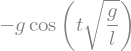

In [3]:
# lado esquerdo da equação
l*theta.diff(t, t)

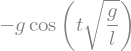

In [4]:
# lado direito
-g*theta

Podemos ver que que a função $\theta(t)$ satisfaz a equação, pois derivando duas vezes e substituindo, o lado direito e o lado esquerdo da equação são inguais.

A seguir mais alguns exemplos de como usar `sympy`para exibir expressões matemáticas em um formato matemático tradicional. 

In [5]:
# definido o símbolo theta para a função
theta_symbol = sp.Function('theta')(t) 

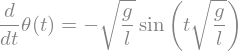

In [6]:
# exibindo uma equação para a derivada primeira
sp.Eq(theta_symbol.diff(t), theta.diff(t))

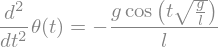

In [7]:
# exibindo uma equação para a derivada segunda
sp.Eq(theta_symbol.diff(t,t), theta.diff(t,t))

Observe o que ocorre se entramos com a equação de forma simbólica:

In [8]:
sp.Eq(l*theta.diff(t,t), -g*theta)

O resultado acima confirma que a função $\theta(t)$ dada é realmente solução da equação do pêndulo.

**Exemplo 3.2:** A equação diferencial $y' = -x y$ tem solução $ y = c \, e^{\frac{-x^2}{2}}$ com $c$ constante, pois 

$$ y' = c \, e^{\frac{-x^2}{2}}(-x) = -xy$$

ou seja, a função $y(x)$ satisfaz a equação. Veja um exemplo de como obter a solução com `sympy`.
 

In [9]:
# Define os símbolos e funções
x,c = sp.symbols('x,c')
y = c*sp.exp(-x**2/2)

# verificando se y é solução
sp.Eq(y.diff(x),-x*y)

Também poderíamos ter resolvido essa EDO usando a função `dsolve` como é mostrado a seguir.

In [10]:
y = sp.Function('y')
dy = sp.Derivative(y(x),x)
edo = sp.Eq(dy,-x*y(x))
sp.dsolve(edo)

Note que esta equação apresenta infinitas soluções, pois, para cada valor diferente de $C_1$ temos uma função diferente que também satisfaz a equação, logo também é solução da equação. 

A seguir vamos usar as bibliotecas`numpy`e `matplotlib`para plotar e visualizar o gráfico de diferentes soluções, fazendo variar a constante $C_1$. Primeiramente importamos as biblioteca NumPy e Matplotlib com as duas linhas de códigos mostrdas a seguir.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

*Observação:* uma vez que essas duas bibliotecas foram importadas não precisamos importar novamente para usar neste notebook.

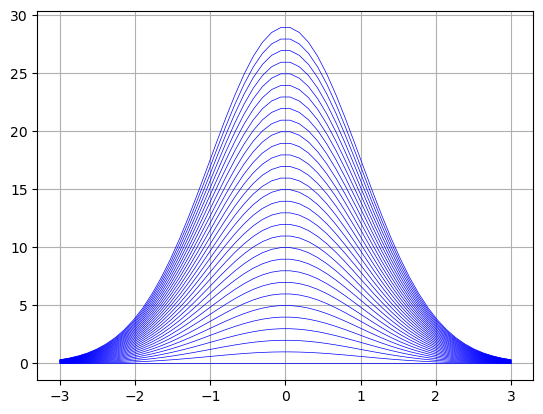

In [12]:
# Definindo a função usando a sintaxe "lambda" 
y = lambda x: np.exp((-x**2)/2) 

# Definindo um intervalo de x para o plot
x = np.linspace(-3,3)

for c in range(30):
    texto = 'c='+str(c)
    plt.plot(x, c*y(x), lw=0.5, color='blue')
    
plt.grid()
#plt.legend()
plt.show()

**Exemplo 3.3:** A equação diferencial $\frac{du}{dt} = t + 2$ tem solução obtida facilmente integrando ambos os lados da equação fazendo

$$ \int \frac{du}{dt}  = \int (t+2)dt $$

$$ u(t) = \frac{t^2}{2}+2t+k$$

em que $k$ é a constante de integração. 

A seguir, as soluções para diversos valores de $k$ podem ser visualizadas como é mostrado abaixo. A curva em vermelho corresponde à solução para $k=8$.

In [13]:
import sympy as sp
t = sp.symbols('t')

In [14]:
sp.integrate(sp.tan(t),t)

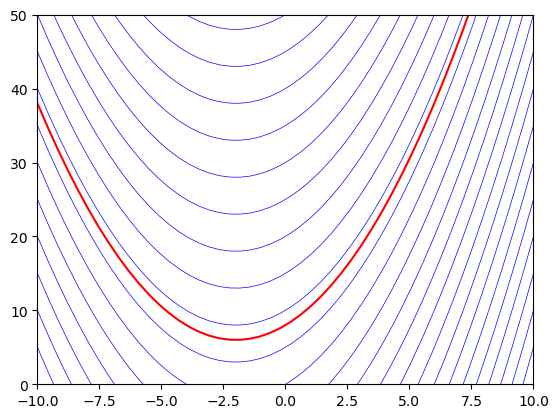

In [15]:
u = lambda t, k: (t**2/2)+2*t+k
t = np.linspace(-10,10)

for k in range(-100,100,5):
    plt.plot(t, u(t,k), color='blue', linewidth=0.5)

plt.plot(t, u(t,8), color='red')
plt.xlim([-10, 10])
plt.ylim([0, 50])
plt.show()

Se impomos uma condição, como por exemplo $u(0)= 8$, obtemos o valor $k=8$, que restringe a solução a uma única curva e não mais à uma família de curvas. Uma equação diferencial com condições iniciais como essa compõem o que chamamos de um *problema de valor inicial* (PVI).

Ou seja, o problema de valor inicial descrito acima pode ser enunciado como

$$ 
\begin{cases} 
\frac {du}{dt}= t+2\\ 
\\
u(0)=8
\end{cases}$$

## 3.3 Abordagem numérica com SciPy

Usando a biblioteca `scipy` podemos obter uma solução numérica para um problema como esse usando a função `solve_ivp`, como é mostrado no código abaixo. Para isso, vamos primeiramente importar a função do módulo `integrate` usando a linha mostrada a seguir.

In [16]:
from scipy.integrate import solve_ivp

Agora o código para solucionar o PVI.

In [17]:
# Definindo a função usando 'def'
def du(t, u): 
    return t+2  

# Dados do problema
t0 = 0.0
tf = 5.0
u0 = [8]
# Discretização do intervalo em 20 pontos
ti = np.linspace(t0,tf,20)

# Obtendo a solução
sol = solve_ivp(du, (t0,tf), u0, t_eval=ti)
np.round(sol.y,4) 

array([[ 8.    ,  8.5609,  9.1911,  9.8906, 10.6593, 11.4972, 12.4044,
        13.3809, 14.4266, 15.5416, 16.7258, 17.9792, 19.3019, 20.6939,
        22.1551, 23.6856, 25.2853, 26.9543, 28.6925, 30.5   ]])

In [18]:
sol.y[0]

array([ 8.        ,  8.56094183,  9.19113573,  9.89058172, 10.65927978,
       11.49722992, 12.40443213, 13.38088643, 14.4265928 , 15.54155125,
       16.72576177, 17.97922438, 19.30193906, 20.69390582, 22.15512465,
       23.68559557, 25.28531856, 26.95429363, 28.69252078, 30.5       ])

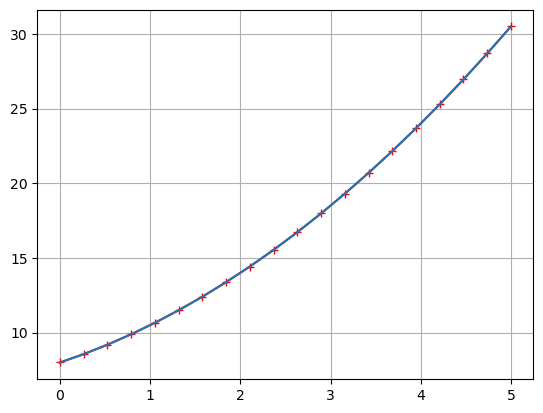

In [19]:
# Plotando a solução numérica e analítica
plt.plot(ti, sol.y[0],'r+-', ti, u(ti,u0))
plt.grid()
plt.show()

O método usado por padrão na função `solve_ivp` é o `RK45`, ou seja,  o método Runge-Kutta explícito de ordem 5(4). O erro é controlado assumindo a precisão do método de quarta ordem, mas os passos são executadas usando a fórmula precisa de quinta ordem. Mais informações sobre outros métodos disponíveis e sua descrição podem ser acessadas em: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

E existência e unicidade da solução de um PVI é garantida, sob certas condições, pelos teoremas *Condição de Lipschits*, *Pincard-Lindelof* e *Dependência contínua na condição inicial* enunciados e demonstrados em Medeiros e Oliveira (2020, p.24) http://www.mat.ufpb.br/milton/disciplinas/edo/livro_edo.pdf)

**Exercícios:**

Em cada um dos problemas a seguir, verifique que cada função dada é solução da equação diferencial.

1. $y''-y=0$; $y_1(t)=e^t$, $y_2(t)=\text{cosh}t$ 


2. $y''+2y'-3y=0$; $y_1(t)=e^{-3}t$, $y_2(t)=e^t$


3. $ty'-y=t^2$; $y(t)=3t+t^2$


4. $y''''+4y'''+3y=t$; $y_1(t)=t/3$, $y_2(t)=e^{-t}+t/3$


5. $t^2 y'+5ty'+4y=0$; $t>0$, $y_1(t)=t^{-2}$, $y_2(t)=t^{-2}\text{ln}t$


Resolva cada um dos problemas de valor inicial a seguir e desenhe os gráficos das soluções para diversos valores de $y_0$. Observe as semelhanças e diferenças entre as soluções.

6. $dy/dx = y-5$, $y(0)=y_0$


7. $dy/dx = 2y-5$, $y(0)=y_0$


8. $dy/dx = 2y-10$, $y(0)=y_0$


9. De acordo com a lei do resfriamento de Newton, a temperatura $u(t)$ de um objeto satisfaz a equação diferencial

$$ \frac{du}{dt} = -k(u-T)$$

em que $T$ é a temperatura ambiente constante e $k$ é uma constante positiva. Suponha que a temperatura inicial do objeto é $u(0) = u_0$.

a) Encontre a temperatura do objeto em qualquer instante.

b) Seja $\tau$ o instante no qual a diferença inicial de temperatura  $u_0 – T$ foi reduzida pela metade. Encontre a relação entre $k$ e $\tau$.


10. Considere um circuito elétrico contendo um capacitor, um resistor e uma bateria. A carga $Q(t)$ no capacitor satisfaz a equação

$$ R \frac{dQ}{dt} + \frac{Q}{C} =V$$

em que $R$ é a resistência, $C$ é a capacitância e $V$ é a voltagem constante fornecida pela bateria.

a) Se $Q(0) = 0$, encontre $Q(t)$ em qualquer instante $t$ e esboce o gráfico de $Q$ em função de $t$.

b) Encontre o valor limite $Q_L$ para onde $Q(t)$ tende após um longo período de tempo.

c) Suponha que $Q(t_1) = Q_L$ e que, no instante $t = t_1$, a bateria é removida e o circuito é fechado novamente. Encontre $Q(t)$ para $t > t_1$ e esboce seu gráfico.

## 3.4 Métodos para EDOs lineares de 1ª ordem 

### Fator integrante

Alguns métodos analíticos para resolução de EDOs são os métodos usando **fator integrante**, método das **variáveis separáveis** e método para **equações exatas**.

Para utilizar o método do **fator integrante**, a EDO deve se apresentar da seguinte forma:
$$y'+p(t)y=g(t)$$

O método consiste em multiplicar ambos os lados da equação por $\mu(t)=e^{\int p(t)dt}$ e integrar, então chega-se à solução geral
$$y(t)=\frac{\int \mu(t)g(t)dt+c}{\mu(t)}.$$

Uma solução particular pode ser obtida calculando o valor da constante $c$ a partir de um valor inicial $y(t_0)=y_0$ dado.

**Exemplo 3.4:** Dada a equação $y'-y=2te^{2t}$, encontre a solução particular sabendo que $y(0)=1$. 

_Solução:_ Multiplicando ambos os lados da equação por $\mu(t)=e^{\int -1 dt}= e^{-t}$ obtém-se

$$y'e^{-t}-ye^{-t}=2te^{2t}e^{-t}$$
ou

$$\frac{d}{dt}\left[ye^{-t} \right]=2te^t$$

Integrando ambos os lados obtemos $ye^{-t}=\int 2te^t dt$ que, integrando por partes, resulta em 

$$y = 2te^{2t}-2e^{2t}+c$$

Como $y(0)=1$, então $c=3$. Logo a solução particular é 

$$y = 2te^{2t}-2e^{2t}+3$$

Conferindo com SymPy:

In [20]:
# Define os simbolos e funções
t = sp.symbols('t')
y = sp.Function('y')
dy = sp.Derivative(y(t),t)

# Define a equação e resolve
eq = sp.Eq(dy-y(t), 2*t*sp.exp(2*t))
sp.dsolve(eq)

Plotando essa função no intervalo de 0 a 1:

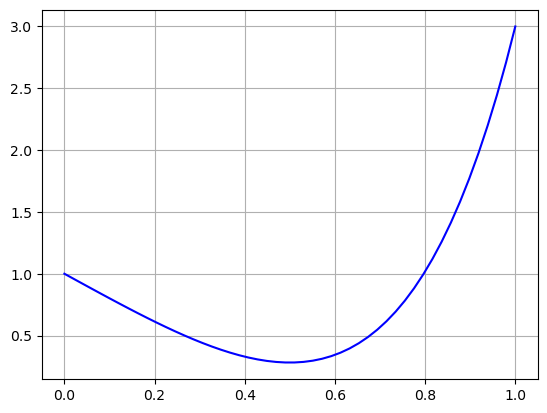

In [21]:
t = np.linspace(0,1)
y = 2*t*np.exp(2*t) - 2*np.exp(2*t)+3
plt.plot(t,y,'b')
plt.grid()
plt.show()

**Exemplo 3.5:** Resolvendo a equação $y' + y = \cos(t)$ usando o fator integrante obtém-se $y(t) = c e^{-t} + \frac{\cos(t) + \sin(t)}{2}$ em que $c$ é determinada pela condição inicial $y(0) = c+1/2$. Vamos plotar as soluções de $y(t)$ no intervalo $0 \leq t \leq 10$ para os valores iniciais $y(0)=-3,-2,-1,0,1,2,3$.

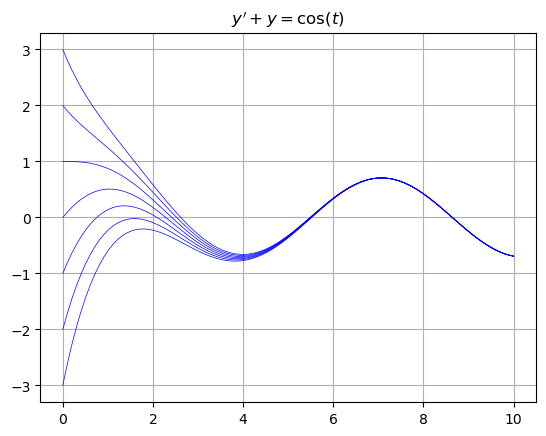

In [22]:
t = np.linspace(0,10,100)
for y0 in range(-3,4):
    c = y0 - 1/2
    y = c*np.exp(-t) + (np.cos(t) + np.sin(t))/2
    plt.plot(t,y,'b', lw = 0.5)
plt.title("$y' + y = \\cos(t)$")
plt.grid()
plt.show()

Nos exemplos acima, conseguimos encontrar a solução geral da equação diferencial de primeira ordem e plotar a solução para diferentes valores iniciais. No entanto, a maioria das equações diferenciais não pode ser resolvida explicitamente com funções elementares. Para esses casos sempre podemos aproximar soluções com métodos numéricos e métodos gráficos.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


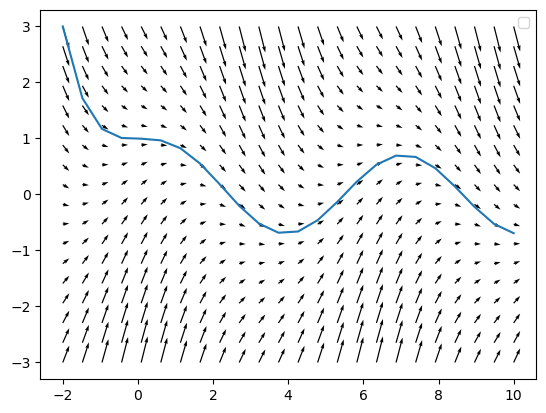

In [23]:
# campo de vetores
t = np.linspace(-2,10, 24)
y = np.linspace(-3, 3, 18)
tm, ym = np.meshgrid(t, y)
dy = np.cos(tm)-ym
dt = np.ones(dy.shape)

# solução do PVI para y0=3
sol = solve_ivp(lambda t,y: np.cos(t)-y, 
                (t[0],t[-1]), [3], t_eval=t)

# plots
#plt.title("Campo de direções para $y' + y = \\cos(t)$")
plt.quiver(tm,ym,dt,dy,width=0.0025)
plt.plot(t, sol.y[0])
plt.legend()
plt.show()

**Exercícios:**

1. Encontre uma solução geral para as seguintes equações

a) $y'+xy=x$

b) $y'+6y=e^x$

c) $y'+3x^2y=sen(x)e^{-x^3}$

2. Resolva o problema de valor inicial (Exemplo 4, p.21, Boyce & Diprima, 2020):

$$\begin{cases}
2y'+ty=2 \\
y(0)=1
\end{cases}
$$


3. Resolva o problema de valor inicial (Exemplo 5, p.21, Boyce & Diprima, 2020):

$$\begin{cases}
ty'+2y=4t^2 \\
y(1)=2
\end{cases}
$$

4. Em cada um dos problemas a seguir 
- Desenhe um campo de direções para a equação diferencial dada; 
- Com base em uma análise do campo de direções, descreva o comportamento das soluções para valores grandes de t; e 
- Encontre a solução geral da equação diferencial dada e use-a para determinar o comportamento das soluções quando $t \rightarrow \infty$.

a) $y'+3y= t+e^{-2t}$

b) $y'-2y = t^2e^{2t}$

c) $y'+y =5 sen(2t)$


Para mais exercícios, busque em Boyce & Diprima (2020), página 22.
Disponível em: https://integrada.minhabiblioteca.com.br/#/books/9788521637134/. Acesso em: 15 ago. 2023.


In [24]:
import sympy as sym
sym.init_printing()

# Define os simbolos e funções
x = sym.symbols('x')
y = sym.Function('y')
dy = sym.Derivative(y(x),x)

# Define a equação e resolve
eq = sym.Eq(dy+x*y(x)-x, 0)
sym.dsolve(eq)

### Equações diferenciais separáveis

Dizemos que uma EDO de 1ª ordem é de **variáveis separáveis** se puder ser escrita na forma

$$ y' = f(t) g(y)$$

nesse caso, escrevemos 

$$\frac{dy}{dt} = f(t) g(y)$$

ou 

$$\frac{1}{g(y)}dy = f(t)dt $$

e integramos o lado esquerdo em relação à $y$ e o lado direito em relação à $t$ para obter a solução, ou seja, fazemos

$$\int \frac{1}{g(y)}\,dy = \int f(x) \,dx + c $$

Vejamos um exemplo:

**Exemplo 3.6:** Seja a equação $y'=xy$, tem-se que $y=0$ é uma solução, para encontrar uma expressão para a solução geral, com $y \neq 0$ podemos usar o método de separação de variáveis fazendo

$$\int \frac{dy}{y} = \int x\,dx$$

$$\ln \, \lvert y\rvert = \frac{x^2}{2} + C$$

$$ \lvert y \rvert = e^{\frac{x^2}{2} + C} = e^{\frac{x^2}{2}} e^C = D e^{\frac{x^2}{2}}$$

Assim, para uma constante $D > 0$ a solução é
$$y = D e^{\frac{x^2}{2}}$$

Podemos usar `sympy` para onter as integrais

In [25]:
from sympy import *
init_printing(use_unicode=True)

x,y = symbols('x,y')
integrate(1/y, y)

In [26]:
integrate(x, x)

Também podemos identificar uma equação separável, se puder ser  escrita na forma diferencial

$$
M(x) d x+N(y) d y=0
$$

**Exemplo 3.7:** Vamos agora resolver $x^2y' = 1 - x^2+y^2 - x^2y^2$ com  $y(1) = 0$ fatorando o lado direito e separando as variáveis.

$$x^2y' = (1 - x^2)(1+y^2)$$

$$\frac{y'}{1+y^2} = \frac{1 - x^2}{x^2} $$

$$\frac{y'}{1+y^2}  = \frac{1}{x^2} - 1 $$

$$\arctan (y)  = \frac{-1}{x} - x + C $$

$$y = \tan \left(\frac{-1}{x} - x + C\right)$$

Aplicando a condição inicial chegamos a 

$$y = \tan \left(\frac{-1}{x} - x + 2 \right)$$

Usando `sympy` para obter as integrais:

In [27]:
i1= sp.integrate(1/(1+y**2), y)

In [28]:
i2 = sp.integrate(1/(x**2) -1, x)

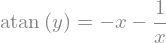

In [29]:
eq = sp.Eq(i1,i2)
eq

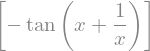

In [30]:
sp.solve(eq,y)

**Exercícios:** 

1) Resolva a equação diferencial dada.

(a) $y'=\frac{x^2}{y}$ 

(b) $y'+y^2sen(x)=0$

(c) $y'=cos^2(x)cos^2(2y)$

(d) $xy'=(1-y^2)^{1/2}$



2) Encontre a solução do problema de valor inicial dado em forma explícita.

(a) $ y^{\prime}=(1-2 x) y^2, \quad y(0)=-1 / 6 $

(b) $y^{\prime}=x y^3\left(1+x^2\right)^{-1 / 2}, \quad y(0)=1$

(c) $y^{\prime}=\left(3 x^2-e^x\right) /(2 y-5), \quad y(0)=1$

(d) $\operatorname{sen}(2 x) d x+\cos (3 y) d y=0, \quad y(\pi / 2)=\pi / 3$


3) **Equações Homogêneas**. Se a função à direita do sinal de igualdade na equação $dy/dx = f(x, y)$ puder ser expressa como uma função só de $y/x$, então a equação é dita homogênea. Tais equações sempre podem ser transformadas em equações separáveis por uma mudança da variável dependente. O a seguir ilustra como resolver equações homogêneas de primeira ordem.

Considere a equação

$$
\frac{d y}{d x}=\frac{y-4 x}{x-y}
$$

Mostre que a equação acima pode ser escrita na forma

$$
\frac{d y}{d x}=\frac{(y / x)-4}{1-(y / x)}
$$

Introduza uma nova variável dependente $v$ de modo que $v = y/x$. Então, expresse $dy/dx$ em função de $x$, $v$ e $dv/dx$ esubstitua $y=xv$ e $dy/dx$ para obter

$$
x \frac{d v}{d x}=\frac{v^2-4}{1-v}
$$

Resolva obtendo $v$ implicitamente em função de $x$. Então, encontre a solução da equação inicial substituindo $v$ por $y/x$ na solução encontrada.

4) Resolva as equações homogêneas

(a) $\frac{d y}{d x}=\frac{x^2+x y+y^2}{\chi^2}$

(b) $\frac{d y}{d x}=\frac{x^2+3 y^2}{2 x y}$

(c) $\frac{d y}{d x}=\frac{4 y-3 x}{2 x-y}$

### Equações exatas

As equações **diferenciais exatas** são aquelas que podem ser colocadas na forma

$$M(x,y)+N(x,y)y'=0$$

em que  $M_y(x,y) = N_x(x,y)$. o que significa que existe uma função $\psi (x, y)$ tal que $\psi_x=M$ e $\psi_y=N$.




Suponha que possamos identificar uma função $\psi (x, y)$ tal que $\psi_x=M$ e $\psi_y=N$ e a função $y(x)$, diferenciável em $x$, é definida implicitamente por $\psi(x,y)=c$, então podemos escrever 

$$M(x,y)+N(x,y)y'= \frac{\partial \psi}{\partial y}+\frac{\partial \psi}{\partial y}\frac{dy}{dx}=\frac{d}{dx} \psi(x,y(x))$$

Então a equação diferencial a ser resolvida fica

$$\frac{d}{dx} \psi(x,y(x)) = 0$$


É possível obter uma expressão explícita para $\psi (x, y)$ integrando $\psi_x=M$  em relação a $x$, incluindo uma função arbitrária $h(y)$ em vez de uma constante arbitrária, depois diferenciaando o resultado em relação a $y$ e igualeando $N$. Então, usando esta última equação para resolver para $h(y)$. O próximo exemplo ilustra esse procedimento.



Vejamos um exemplo.

**Exemplo 3.8:** Vamos resolver a equação 

$$2x+y^2+2xyy'=0 \text.$$

Primeiramente notemos que para $\psi(x,y)=x^2+xy^2$ temos que $\psi_x = 2x+y^2$ e $\psi_y=2xy$, então, a equação pode ser escrita como 

$$ \frac{\partial \psi}{\partial y}+\frac{\partial \psi}{\partial y}\frac{dy}{dx}=0$$

considerando que $y$ é função de $x$ e usando a regra da cadeia podemos escrever

$$ \frac{\partial \psi}{\partial x}(x,y)=\frac{d}{dx}(x^2+xy^2)=0$$

que integrando obtem-se a solução geral

$$ \psi(x,y)=x^2+xy^2=c \text.$$

ou

$$ y(x) = \pm \sqrt{\frac{c}{x}-x}$$


Usando Sympy para resolver

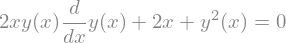

In [31]:
import sympy as sym
sym.init_printing(use_unicode=True)

t, l, x = sym.symbols('t lambda x')
y = sym.Function('y')(x)

expr = sym.Eq(2*x+y*y+2*x*y*y.diff(x),0)
expr

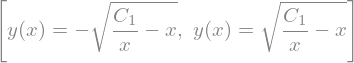

In [32]:
sym.dsolve(expr)

**Exemplo 3.9:** Resolva a equação diferencial

$$
\left(y \cos x+2 x e^y\right)+\left(\operatorname{sen} x+x^2 e^y-1\right) y^{\prime}=0 .
$$

*Solução:*
Calculando $M_y$ e $N_x$, vemos que
$$M_y(x, y)=\cos x+2 x e^y=N_x(x, y),$$

de modo que a equação dada é exata. Então, existe uma $\psi_x(x, y)$ tal que
$$\psi_x(x, y)=y \cos x+2 x e^y$$

$$\psi_y(x, y)=\operatorname{sen} x+x^2 e^y-1$$

Integrando a primeira dessas equações, obtemos
$$\psi(x, y)=y \operatorname{sen} x+x^2 e^y+h(y).$$



A seguir, calculando $\psi_x$ da equação anterior e fazendo $\psi_y = N$, temos
$$
\psi_\nu(x, y)=\operatorname{sen} x+x^2 e^y+h^{\prime}(y)=\operatorname{sen} x+x^2 e^y1.
$$

Assim, $h'(y) = –1$ e $h(y) = –y$. Substituindo $h(y)$, obtemos

$$
\psi_\nu(x, y)=\operatorname{sen} x+x^2 e^y+h^{\prime}(y)=\operatorname{sen} x+x^2 e^y- 
$$

Portanto, as soluções são dadas implicitamente por

$$
y \operatorname{sen} x+x^2 e^y-y=c
$$

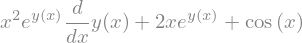

In [33]:
M = y*sp.cos(x)+2*x*sp.exp(y)
N = sp.sin(x)+x**2*sp.exp(y)-1

display(sp.diff(M, y))
display(sp.diff(N,x))

Ver Exemplo 3, em [Boyce(2020, p51)](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/28%5B%3Bvnd.vst.idref%3Dchapter02%5D!/4/700/24/11:52%5Bque%2C%20qu%5D).

Algumas vezes, é possível converter uma equação diferencial que não é exata em uma exata multiplicando-se a equação por um **fator integrante** apropriado. 

Por exemplo, se $(M_y – N_x)/N$ for uma função só de $x$, então existirá um fator integrante $\mu$ que também só depende de $x$. Além disso, $\mu(x)$ pode ser encontrado resolvendo-se a equação linear e separável

$$\frac{d\mu}{dx} = \frac{M_y-N_x}{N}\mu $$

Um procedimento semelhante pode ser usado para determinar uma condição sob a qual a equação diferencial tenha um fator integrante que depende só de $y$.

Ver Exemplo 4, em [Boyce(2020, p52)](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/28%5B%3Bvnd.vst.idref%3Dchapter02%5D!/4/734/1:57%5Bnar%2C%20um%5D).

## Exercícios:

(DICA) Para resolver uma equação diferencial de 1ª ordem, como por exemplo $y'+y=0$, $y=y(t)$, podemos proceder da seguinte maneira:

In [34]:
# definindo a variavel independente como símbolo
t = sp.symbols('t')

# definido uma função com classe Functiol
y = sp.Function('y')(t)

# definindo a equação em que y'=
eq = y.diff(t)+y

# resolvendo a equacao
sp.dsolve(eq, y)

Use os passos acima para resolver as sequintes equações e teste a solução obtida.

(a) $y'=\frac{x^2}{y}$ 

(b) $y'+y^2sen(x)=0$

(c) $y'=cos^2(x)cos^2(2y)$

(d) $xy'=(1-y^2)^{1/2}$

(e) $y'+xy=x$

(f) $y'+6y=e^x$

(g) $y'+3x^2y=sen(x)e^{-x^3}$

**Referências**

BOYCE, William E. Equações Diferenciais Elementares e Problemas de Valores de Contorno. Grupo GEN, 2020. E-book. ISBN 9788521637134. Disponível em: https://integrada.minhabiblioteca.com.br/#/books/9788521637134/. Acesso em: 19 mar. 2023.

KONG, Qingkai; SIAUW, Timmy; BAYEN, Alexandre M. Python Programming and Numerical Methods: A Guide For Engineers And Scientists. ed 1, Academic Press, 2021. DOI: https://doi.org/10.1016/C2018-0-04165-1. Disponível em:
https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html. Acesso em: 23 mar. 2023
